In [1]:
import cv2
import numpy as np 
import os
import matplotlib.pyplot as plt
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nhan-121/mang.JPG


## 1. Mở đầu về histogram trong xử lý ảnh.
### 1.1 Histogram in Image-processing
Như ta đã biết, `histogram` trong thống kê chính là dạng biểu đồ cột, thể hiện mức độ phân bố dữ liệu theo tần số và tần suất; như vậy thì trong `xử lý ảnh (image processing)` cũng như trong `thị giác máy tính (Computer Vision)` thì `histogram` được hiểu như thế nào? 

Khá đơn giản, một bức ảnh màu kỹ thuật số sẽ được lưu trữ dưới dạng một mảng 3 chiều với 3 kênh tương ứng là `Green, Red` và `Blue` đại điện cho 3 màu cơ bản trong thang màu `BGR` với các giá trị `pixel` được lưu trữ dạng `8-bits-integers` (là các số nguyên có giá trị từ `0` đến `255`). Do đó, `histogram` của một hình ảnh sẽ phản ánh được các vấn đề về phân bố các giá trị `pixel` của 3 kênh màu này; và khi nhìn vào biểu đồ này, ta có thể nhận xét được `độ sáng (brightness)`, `độ tương phản (contractness)` cũng như phân bố về `cường độ ánh sáng (intensity)`.
### 1.2. Compute the histogram.
Trong `OpenCV`, để phân hoạch một hình ảnh thành các mảng một chiều (tương ứng 3 kênh `Red, Green, Blue`) thì ta có thể sử dụng hàm `cv2.calHist` với cú pháp như sau:

                        cv2.calcHist(images,channels,mask,histSize,ranges)

trong đó:
- `images` (`nd-array`) là hình được nhập qua lệnh `cv2.imread`. Chính xác hơn, đây là hình mà chúng ta muốn tính `histogram`
- `channels` (`list`): là `list` chứa các số `[0, 1, 2]`. Như đã nói ở phần mở đầu, một hình (`màu`) sẽ có 3 kênh `red, green, blue` nên ta cần đưa khai báo cụ thể về kênh nào sẽ được thực hiện khi tính hisgogram.
- `mask` (): tham số này giống như một `điều kiện (lọc hình ảnh)` để ta chỉ tính histogram cho hình ảnh trên điều kiện cho trước này.
- `histSize`: chính là số các `bins` khi khai báo để vẽ histogram, từ số này ta có thể tính được số cột tối đa trong histogram ở cả 3 kênh. Ví dụ `histSize = 8` tức là cả 3 kênh `Red, Green, Blue` đều có 8 cột, hay dãi giá trị của nó sẽ được chia thành 8 vùng bằng nhau: `[0, 31], [32, 63], ..., [224, 255]`
- `ranges` là dãi các giá trị pixel, thường là `[0, 256]`

## 2. Minh họa & ứng dụng (`Illustration & application`)
### 2.1. Histogram cho hình trắng đen (`Gray-scale Histogram`)
Trong phần này, tôi sẽ dùng `jupyter-notebook` và cho hiển thị kết quả minh họa qua thư viện `matplotlib` với hàm `imshow`.

Nhắc lại rằng, vì chúng ta đang tải hình trắng-đen nên

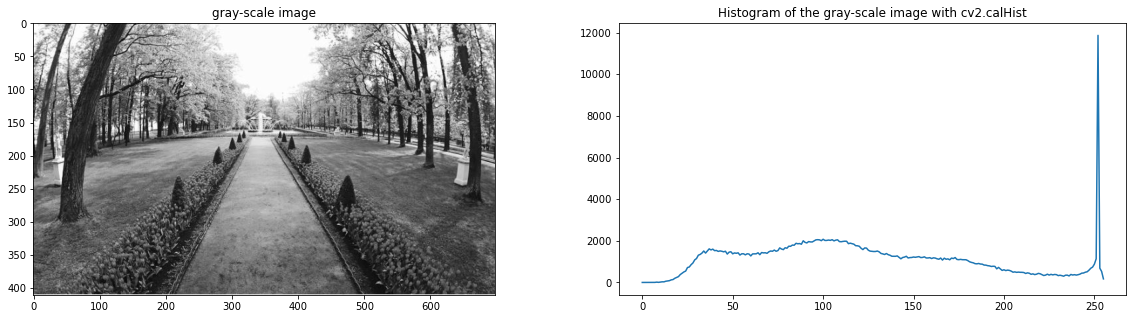

In [2]:
image = cv2.imread(r'/kaggle/input/nhan-121/mang.JPG')

## chuyển hình từ thang BGR sang trắng đen(gray)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

## Tính histogram cho hình này
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

## Hiển thị hình gốc cùng histogram của nó trên matplotlib
plt.figure(figsize = (20, 5))
plt.subplot(121); plt.imshow(image, cmap = 'gray'); plt.title('gray-scale image')
plt.subplot(122); plt.plot(hist); plt.title('Histogram of the gray-scale image with cv2.calHist')
plt.show()

Ta thấy rằng có rất nhiều giá trị pixel tâp trung trong khoảng `[250, 255]` đây là vùng có giá trị màu trắng, ngược lại số pixel có giá trị thấp hơn `30` (vùng màu tối trong thang trắng đen - `gray scale`).

Trong khi đó, vùng giá trị pixel còn lại (từ 30 đến 250) có phân bố tương đối đồng đều. 

### 2.2. Histogram cho ảnh màu (colored histogram)
Trong phần này, tôi cũng thực hiện bước hiển thị kết quả qua thư viện `matplotlib`

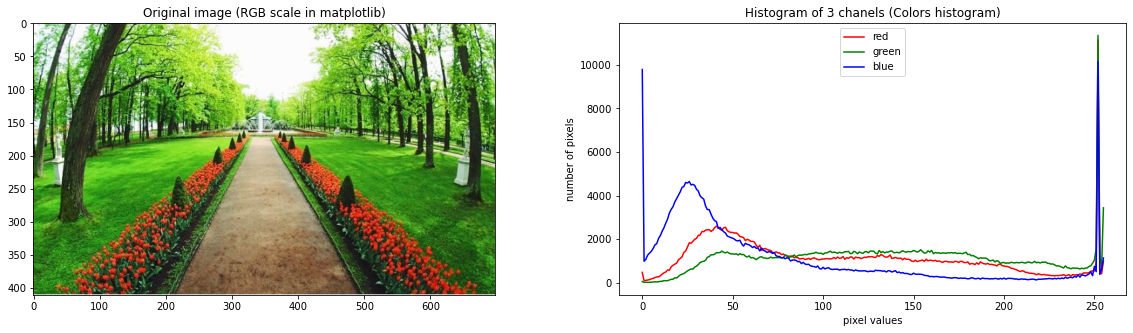

In [3]:
image = cv2.imread(r'/kaggle/input/nhan-121/mang.JPG')
colors = ['red', 'green', 'blue']
## chuyển hình từ thang BGR sang thang tiêu chuẩn RGB trong matplotlib (bằng cách đảo thứ tự 2 kênh Red và Green)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (20, 5))
plt.subplot(121); plt.imshow(image, cmap = 'gray'); plt.title('Original image (RGB scale in matplotlib)')

plt.subplot(122); plt.title('Histogram of 3 chanels (Colors histogram)')
for k in range(3):
    hist = cv2.calcHist([image], [k], None, [256], [0, 256])
    plt.plot(hist, color = colors[k], label = colors[k])
    plt.ylabel('number of pixels')
    plt.xlabel('pixel values')
    plt.legend()

Như vậy, khi nhìn vào bố cục histogram của hình (màu) này, ta thấy rằng:
- Ở 2 kênh `red` và `green`; thì có sự trải đều các giá trị pixel trong vùng `[40, 180]`, do đó ta có thể đoán được rằng sắc đỏ và xanh lá trong hình không quá tối cũng không quá sáng.
- Ở kênh màu xanh dương (`blue chanel`), hầu hết giá trị pixel tập trung trong vùng `[0, 100]` và đây là vùng có cường độ sáng thiên về màu tối với kênh `blue` này. Tuy nhiên trong hình ảnh thì ta lại không thấy sự xuất hiện nào của màu xanh dương, điều này có thể được hiểu bởi phép cộng tính của 3 kênh màu, ví dụ `[0, 0, 50]` là xanh dương đậm (`darker blue`); `[0, 0, 255]` là xanh dương sáng (`brighter blue`) trong khi `[255, 255, 100]` lại là màu vàng nhạt trong thang màu `RGB`. Độc giả có thể xem phần minh họa trong hình dưới đây

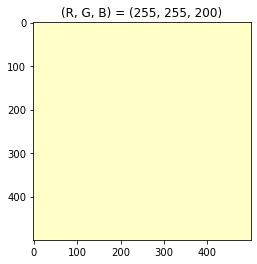

In [4]:
A = np.zeros((500, 500, 3), dtype = np.uint8)
A[:, :, 0] = 255    ## gán kênh màu đỏ trong RGB = 255
A[:, :, 1] = 255    ## gán kênh màu xanh lá trong RGB = 255
A[:, :, 2] = 200    ## gán kênh màu xanh dương trong RGB = 200

plt.imshow(A)
plt.title('(R, G, B) = (255, 255, 200)')
plt.show()

Tiếp theo, câu hỏi được đặt ra tiếp theo trong bài toán thống kê giá trị pixel của xử lý ảnh là : `"Có bao nhiêu pixel có màu đỏ là 200 và màu xanh dương là 200"?`

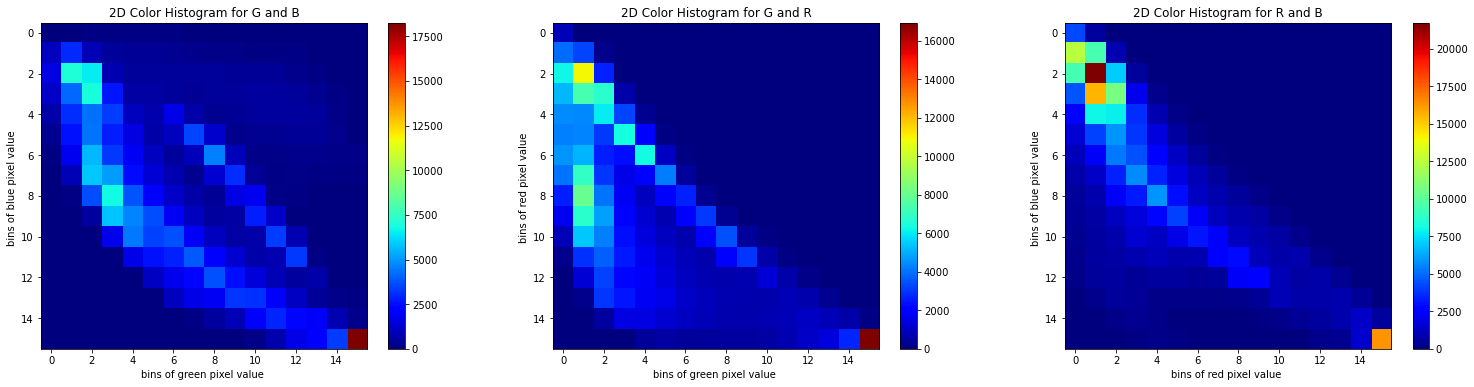

In [5]:
## Khai báo kích thước của kết quả hình hiển thị
fig = plt.figure(figsize = (26, 6))

## Tạo list các cặp kênh để vẽ; lần lượt là {(Green & Blue), (Green & Red), (Red & Blue)}
chanel_pairs = [ [image[:,:,1], image[:,:,0]], [image[:,:,1], image[:,:,2]], [image[:,:,0], image[:,:,2]] ]

## Tạo tiêu đề cho mỗi hình
titles = ['2D Color Histogram for G and B', '2D Color Histogram for G and R', '2D Color Histogram for R and B']
xlabs = ['green pixel value', 'green pixel value', 'red pixel value']
ylabs = ['blue pixel value', 'red pixel value', 'blue pixel value']

## Vẽ
for k in range(3):
    ax = fig.add_subplot(1, 3, k+1)  ## lần lượt vẽ hình từ trái sang trong grid các hình: 1 hàng - 3 cột
    hist = cv2.calcHist(chanel_pairs[k], [0, 1], None, [16, 16], [0, 256, 0, 256])  ## Thực hiện histogram cho cặp kênh được chỉ định
    p = ax.imshow(hist, interpolation = "nearest", cmap = 'jet')
    ax.set_xlabel('bins of %s '%xlabs[k])
    ax.set_ylabel('bins of %s '%ylabs[k])
    ax.set_title(titles[k])                  
    plt.colorbar(p)

Trên đó, ta đã thực hiện tổ hợp các cặp kênh màu cơ bản trong thang `RGB` gồm `"Green & Blue"`, `"Green & Red"` và `"Red & Blue"`. Ở đây, ta đã phân chia histograms này thành `16 cột (blocks)`, điều này đồng nghĩa với ô vuông có tọa độ `[i, j]` sẽ tương ứng với giá trị pixel trong vùng 
$$\lbrace (x, y): 16 i \leq x \leq 16(i+1), 16j \leq y \leq 16(j+1) \rbrace$$

trong đó $i, j$ là các số nguyên thỏa $0 \leq i, j \leq 15$. 

Như vậy, nhìn vào bảng phân phối 2D-histogram này thì chúng ta sẽ nhận được điều gì? Khá đơn giản,
- Chẳng hạn như nếu ta quan tâm đến sự phân bố giá trị pixel của cặp kênh `Red & Blue` thì hãy quan sát biểu đồ bên góc phải ngoài cùng.
- Nếu bạn muốn biết có bao nhiêu pixel của cặp `Red & Blue` với điều kiện `Red` $\in [16, 32]$ và `Blue` $\in [32, 48]$ thì hãy nhìn vào ô vuông có tọa độ (2, 3) trong hình bên phải. Màu của ô vuông này là màu `nâu đỏ`; bấy giờ hãy đối chiếu sang thang màu (`colorbar`) bên cạnh và thấy rằng màu nâu đỏ tương ứng với `trên 20000`. Điều này có nghĩa là có hơn 20000 pixel có thỏa điều kiện `Red` $\in [16, 32]$ và `Blue` $\in [32, 48]$.
- Cuối cùng, `colorbar` cho ta biết số lượng pixel nằm trong một vùng nào đó, và hiểu được `colorbar` cũng như phép cộng tính màu cơ bản (`color additive`) thì ta có thể hiểu được sự phân tán màu sắc của cặp kênh ấy. Nhắc lại cho những ai không biết về `additive colors`: 

$\qquad \qquad$ hợp của 2 màu `red & blue` sẽ cho ra `magenta (màu hồng tím)`

$\qquad \qquad$ hợp của 2 màu `red & green` sẽ cho ra `yellow`

$\qquad \qquad$ hợp của 2 màu `green & blue` sẽ cho ra `cyan (màu xanh nhạt)`

$\qquad$ Để hiểu rõ hơn những gì tôi nói, hãy xem ví dụ minh họa sau đây,

#### Ví dụ 1. Thay đổi các giá trị trong màu `magenta` tạo thành từ 2 kênh `red` và `blue`

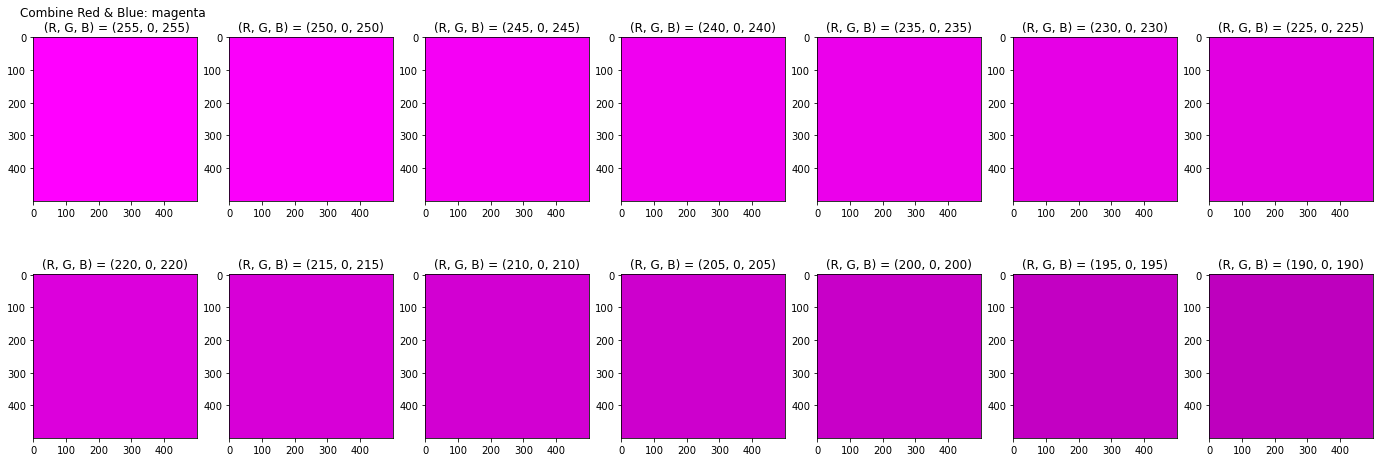

In [6]:
fig, ax = plt.subplots(nrows = 2, ncols = 7, figsize = (24, 8))
ax = ax.ravel()
for k in range(14):
    A = np.zeros((500, 500, 3), dtype = np.uint8)
    A[:, :, 0] = 255 - 5*k     ## gán kênh màu đỏ trong RGB
    A[:, :, 2] = 255 - 5*k     ## gán kênh màu xanh dương trong RGB
    ax[k].imshow(A)
    if k == 0:
        ax[k].set_title('Combine Red & Blue: magenta \n (R, G, B) = (255, 0, 255)')
    else:
        ax[k].set_title('(R, G, B) = (%s, 0, %s)'%(255 - 5*k, 255 - 5*k))

#### Ví dụ 2. Tương tự là `cyan` là hơp bởi `green` và `blue`.

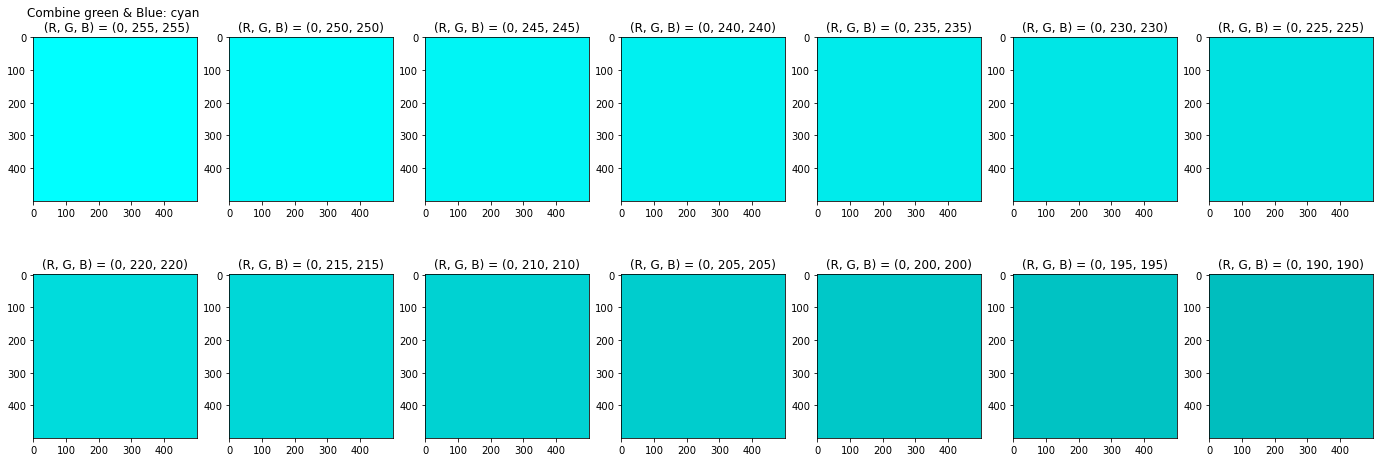

In [7]:
fig, ax = plt.subplots(nrows = 2, ncols = 7, figsize = (24, 8))
ax = ax.ravel()
for k in range(14):
    A = np.zeros((500, 500, 3), dtype = np.uint8)
    A[:, :, 1] = 255 - 5*k     ## gán kênh màu xanh lá trong RGB
    A[:, :, 2] = 255 - 5*k     ## gán kênh màu xanh dương trong RGB
    ax[k].imshow(A)
    if k == 0:
        ax[k].set_title('Combine green & Blue: cyan \n (R, G, B) = (0, 255, 255)')
    else:
        ax[k].set_title('(R, G, B) = (0, %s, %s)'%(255 - 5*k, 255 - 5*k))

#### Ví dụ 3. Tương tự là màu vàng

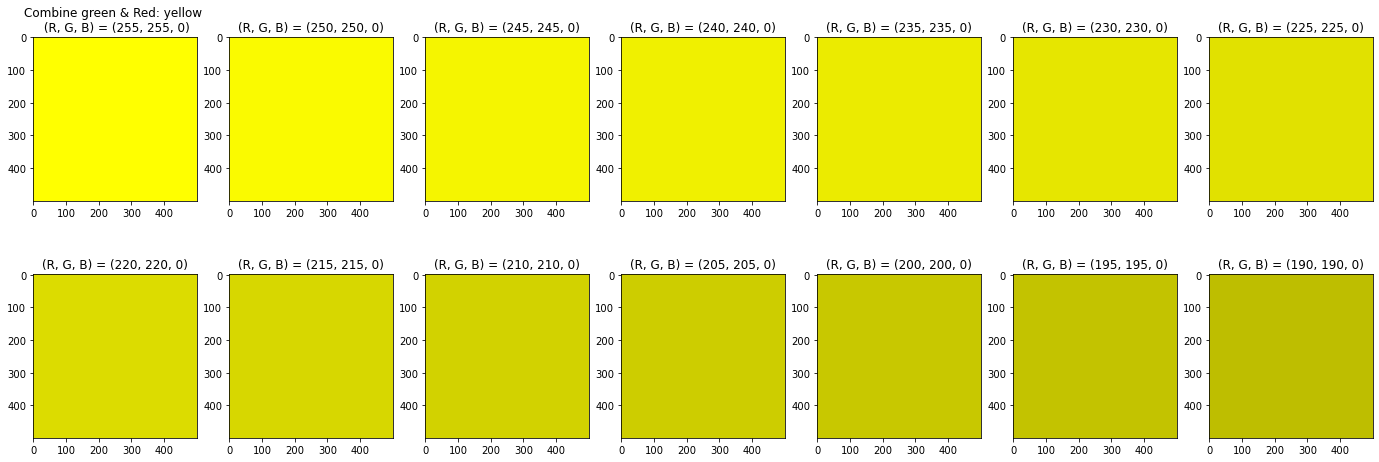

In [8]:
fig, ax = plt.subplots(nrows = 2, ncols = 7, figsize = (24, 8))
ax = ax.ravel()
for k in range(14):
    A = np.zeros((500, 500, 3), dtype = np.uint8)
    A[:, :, 0] = 255 - 5*k     ## gán kênh màu đỏ trong RGB
    A[:, :, 1] = 255 - 5*k     ## gán kênh màu xanh lá trong RGB
    ax[k].imshow(A)
    if k == 0:
        ax[k].set_title('Combine green & Red: yellow \n (R, G, B) = (255, 255, 0)')
    else:
        ax[k].set_title('(R, G, B) = (%s, %s, 0)'%(255 - 5*k, 255 - 5*k))

#### Một câu hỏi khác nữa được đặt ra sau khi ta đã quan sát về `2D-histogram` là: `"Liệu rằng ta có thể quan sát về phân phối của bộ 3 pixel các kênh này cùng một lúc hay không"?`

Câu trả lời: Hãy vẽ 3D-histogram cho chúng?

In [9]:
n_bins = 8
hist = cv2.calcHist([image], [0, 1, 2], None, [n_bins, n_bins, n_bins], [0, 256, 0, 256, 0, 256])
hist.shape

(8, 8, 8)

Vấn đề lúc này là ta sẽ rất khó để nhìn một cách tường minh 3D-histogram này; tuy nhiên hãy dùng cấu trúc `DataFrame` bằng cách `reshape` lại và định nghĩa tương ứng vùng giá trị pixel cho chúng. Lúc này là quá đơn giản rồi, hãy xem kết quả sau đây!!

In [10]:
R_range = []
G_range = []
B_range = []

for b in range(n_bins):
    for g in range(n_bins):
        for r in range(n_bins):
            R_range.append("[%s, %s)"%(int(256 / n_bins)*r, int(256 / n_bins)*(r+1)))
            G_range.append("[%s, %s)"%(int(256 / n_bins)*g, int(256 / n_bins)*(g+1)))
            B_range.append("[%s, %s)"%(int(256 / n_bins)*b, int(256 / n_bins)*(b+1)))

import pandas as pd

hist_3d_data = pd.DataFrame({'Red_range pixel': R_range, 
                              'Blue_range pixel': B_range,
                              'Green_range pixel': G_range,
                              '# of pixels': hist.ravel()})        
hist_3d_data.head()

,Red_range pixel,Blue_range pixel,Green_range pixel,# of pixels
0,"[0, 32)","[0, 32)","[0, 32)",4037.0
1,"[32, 64)","[0, 32)","[0, 32)",94.0
2,"[64, 96)","[0, 32)","[0, 32)",0.0
3,"[96, 128)","[0, 32)","[0, 32)",0.0
4,"[128, 160)","[0, 32)","[0, 32)",0.0


Bấy giờ nếu như muốn tìm vùng giá trị nào có nhiều pixel nhất thì đó là việc của các bạn, (xem đáp án ở dưới)

In [11]:
print(hist_3d_data.max())

Red_range pixel      [96, 128)
Blue_range pixel     [96, 128)
Green_range pixel    [96, 128)
# of pixels              19870
dtype: object


### 2.3. Histogram Equalization 
Hay còn gọi là `cân đối histogram`, là phương pháp giúp "cân bằng" các mảng `sáng` và `tối` ở các góc trong hình được tải, theo đó những vùng có `cường độ sáng` tương phản kề nhau trong hình sẽ được xử lý bằng phương pháp `“stretching”`, tức là nối dài phân phối của các pixel (từ những vùng có số rất ít pixel đến các lân cận nhiều hơn) để tránh tạo ra sự đột biến về chênh lệch cường độ sáng trong hình ảnh, theo đó nhìn vào histogram này sẽ trông thấy được nó có vẻ cân bằng hơn so với ban đầu.

Để thực hiện phương pháp này thì trong `OpenCV` ta có thể sử dụng lệnh `cv2.equalizeHist`, và hàm này chỉ nhận duy nhất một tham số là hình đưa vào.

**Một lưu ý cực kỳ quan trọng là hình ảnh được tải lên nên ở dạng trắng đen (`gray-scale`)**

OK! Done, đó là những gì tôi giới thiệu về hàm này, sau đây chúng ta sẽ minh họa nó bằng cách đối chiếu kết quả của 2 cặp `hình ảnh` lẫn `histogram` trước và sau khi thực hiện `histogram equalization,` Let's go!

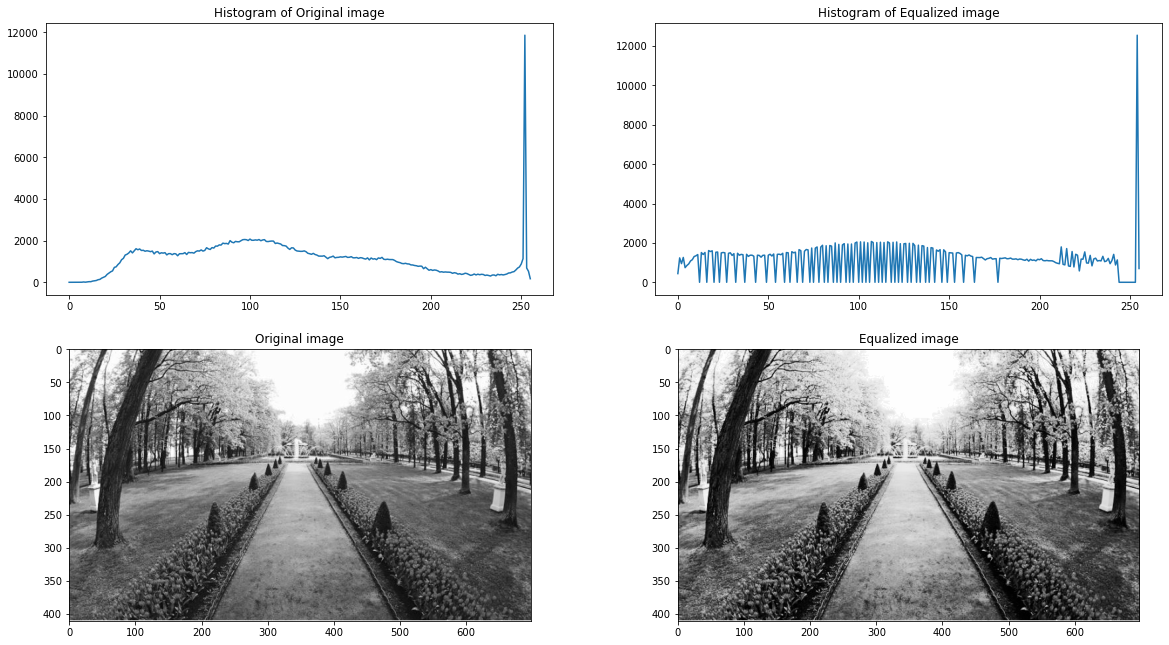

In [12]:
image = cv2.imread(r'/kaggle/input/nhan-121/mang.JPG')

## chuyển hình từ thang BGR sang trắng đen(gray)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

## thực hiện equalization cho hình đã tải và lưu nó dưới tên eq_img
eq_img = cv2.equalizeHist(image)

## Tạo list 2 hình và list các tiêu đề
images = [image, eq_img]
titles = ['Original image', 'Equalized image']

## Hiển thị cả 2 hình và histogram của chúng
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 11))
ax = ax.ravel()

for k in range(2):
    ax[k + 2].imshow(images[k], cmap = 'gray'); ax[k].set_title('Histogram of %s'%titles[k])
    hist = cv2.calcHist([images[k]], [0], None, [256], [0, 256])
    ax[k].plot(hist); ax[k + 2].set_title(titles[k])

**Nhận xét!**
- Ở histogram bên trái (trên cùng) thì vùng giá trị pixel khoảng `[0, 30]` có số pixel gần hoặc bằng `0` thì ở histogram bên phải nó đã được `“stretching”` để có sự liên tục khi nối qua các vùng kế tiếp. Dạng `răng cưa` trong histogram bên phải sinh ra chính vì sự `nối dài (“stretching”)` giá trị các pixel từ phân phối ban đầu, theo đó nó cũng tạo ra sự phân phối mới về các pixel trong hình bên phải góc dưới.
- Do đó, hình mà sau khi được cân bằng histogram sẽ cho ra các mảng sáng tối rõ rệt hơn hình ban đầu.

### 2.4. Histogram of mask
Phần cuối cùng trong bài giảng hôm nay của tôi là viết về `histogram` cho một `khu vưc (region, area)` cụ thể nào đó ở trong hình, tức là cần một `biến (variable)` để khai báo `điều kiện (mask, condition)` về giới hạn của `miền con của hình (sub-region of the image)`.

#### Ví dụ 4. Considering the region of plant / grass

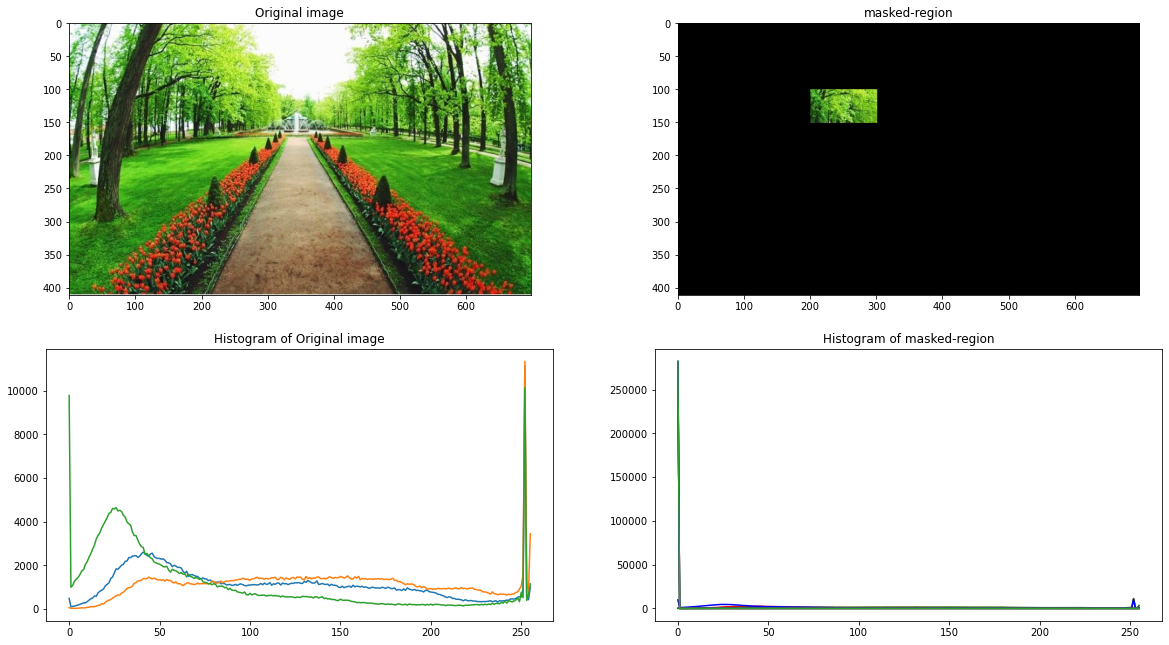

In [13]:
image = cv2.imread(r'/kaggle/input/nhan-121/mang.JPG')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

## Tạo mask
mask = np.zeros(image.shape[:2], dtype = np.uint8)

## Chọn vùng chứa thảm thực vật là hình chữ nhật được giới hạn bởi 2 cặp đỉnh đối nhau là (200, 100) & (300, 150)
cv2.rectangle(mask, (200, 100), (300, 150), 255, -1)
masked = cv2.bitwise_and(image, image, mask = mask)
colors = ['red', 'green', 'blue']
    
## Tạo list các hình và tiêu đề
images = [image, masked]
titles = ['Original image', 'masked-region']

## Hiển thị
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 11))
ax = ax.ravel()
for k in range(2):
    ax[k].imshow(images[k]); ax[k].set_title(titles[k])
    for i in range(3):
        hist = cv2.calcHist([images[k]], [i], None, [256], [0, 256])
        plt.plot(hist, color = colors[i])
        ax[k+2].plot(hist)
    ax[k+2].set_title('Histogram of %s'%titles[k])  
                 

Như vậy, khi ta chọn vùng chứa các thảm thực vật như trên thì histogram lúc này cho ra kênh chủ đạo là màu xanh lá (`green`) nên số pixel hầu hết nằm ở kênh này, trong khi 2 kênh còn lại thì không đáng kể.